Import required libraries

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load Image (Reading image file and displaying)

In [16]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    return img

Calling read_image() to read image file and display 

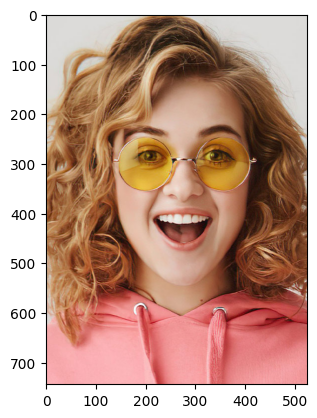

In [17]:
filename ="image1.jpg"
img = read_file(filename)

original_img = np.copy(img)

Generating Edge Mask of the image (to identify edges of the image and highlight them)

In [18]:
def edge_mask(img, line_size, blur_value):
    """Here we scale the input image and obtain its edge mask"""
    
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # medaianBlur(source, dest, kernel size)
    gray_blur = cv2.medianBlur(gray_img, blur_value)
    
    # adaptiveThreshold(src,dst,maxValue,adaptiveMethod,thresholdType, blockSize, C)
    # adaptive methods : ADAPTIVE_THRESH_MEAN_C & ADAPTIVE_THRESH_GAUSSIAN_C
    # threshold type: variable of integer type representing the type of threshold to be used
    edges = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, line_size, blur_value)
    
    return edges
    

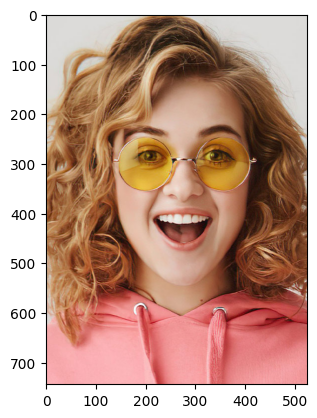

In [19]:
plt.imshow(img)
plt.show()

In [20]:
# We generate an array representing the edge mask of the image
edge_mask(img, line_size=7, blur_value=7)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

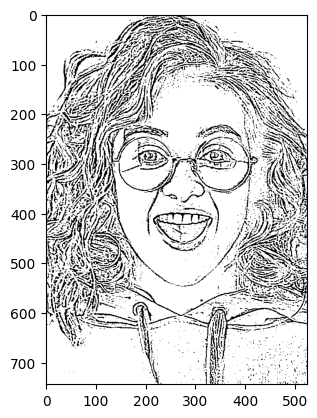

In [21]:
# to display the matrix in the form of an image
# modified as per my convenience
edges = edge_mask(img, line_size=5, blur_value=3)
plt.imshow(edges, cmap='gray')
plt.show()

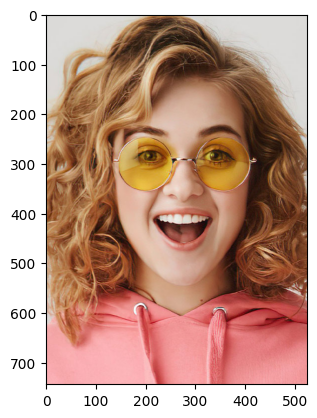

In [22]:
plt.imshow(img)
plt.show()

Reducing the Color Palette (Reducing the number of colors using Color Quantization)

In [23]:
def color_quantization (img, k):
    """
        Color Quantization is the process of reducing the number of colors in an image while preserving its visual appearance.
        'K' value indicate the number of colors in the input image 'img'
    """    
    # Transform the image into 1D array of 32bit floating point numbers, then reshape it into 2D array
    data = np.float32(img).reshape((-1, 3))
    # np.float32() provides advantages in terms of memory usage, computation speed, and consistency across platforms compared to Python float
    # reshape((-1,3)), here -1 indicate size of that dimension should be automatically calculated based on size of input array & other specified dimension(3 here).
    # resultant data can be used as input to color quantization algorithm, to group similar colors and reduce no. of distinct colors
    
    # Determine criteria for termination of iterative algorithms
    # We use a combination of two criteria: max no. of iterations & min. change in parameters being optimized
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    # cv2.TERM_CRITERIA_EPS - specifies that alorithm should stop iterating if the specified accuracy or tolerance is achieved
    # cv2.TERM_CRITERIA_MAX_ITER - specifies that algorithm should stop iterating if max. no. of iterations reached
     
    # Implementing K-Means clustering algorithm
    # K-means clustering algorithm works by randomly selecting k data points as initial centroids, where k is the number of clusters to be created.
    # the algorithm iteratively assigns each data point to the nearest centroid, computes the mean of the data points assigned to each centroid, and updates the centroid position. 
    # This process continues until convergence is achieved
    # The quality of the clustering results can be highly dependent on the initial centroid positions, and the algorithm may converge to suboptimal solutions if the initial centroids are not well-chosen.
    
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result
    

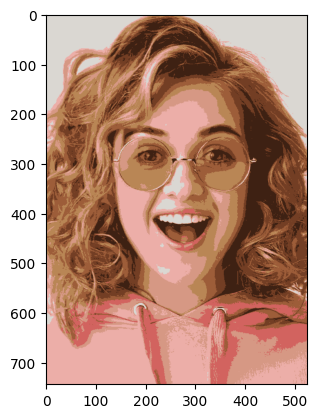

In [24]:
img = color_quantization(img, k=8)
plt.imshow(img)
plt.show()

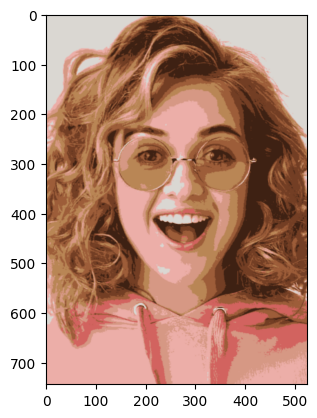

In [25]:
# Reduce the noise
# modified as per my convenience
blurred = cv2.bilateralFilter(img, d=3, sigmaColor=250,sigmaSpace=250)
plt.imshow(blurred)
plt.show()

Combine Edge Mask with Quantized Image

In [26]:
def cartoonize(blurred):
    
    cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
    plt.imshow(cartoon)
    plt.show()

    plt.imshow(original_img)
    plt.show()

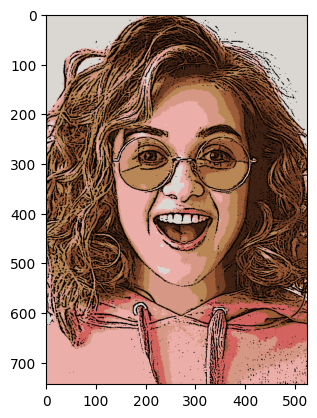

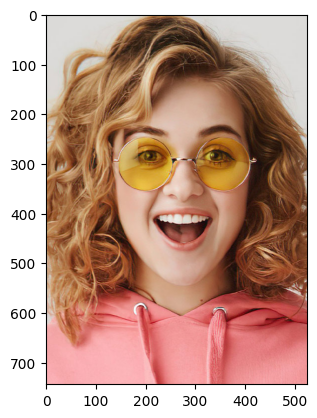

In [27]:
cartoonize(img)
